In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six in c:\users\270881\appdata\roaming\python\python37\site-packages (from cycler>=0.10->matplotlib) (1.15.0)



In [7]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=4b29f92b2748d655a827724e69e7473493f3fb4b95b8984c2d504e3688d33f74
  Stored in directory: c:\users\270881\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [69]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [70]:
df=pd.read_csv(r'C:\Users\270881\Desktop\Python Pandas\sonar\sonar.csv',header=None)

In [71]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [115]:
X=df.iloc[:,0:60]
Y=df.iloc[:,60]



In [116]:
def one_hot_encoder(labels):
    """
    Define the encoder function
    """
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode


In [117]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y= one_hot_encoder(Y)

In [118]:
from sklearn.utils import shuffle
X,Y= shuffle(X,Y,random_state=1)

In [119]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=415)

In [120]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(166, 60)
(166, 2)
(42, 60)


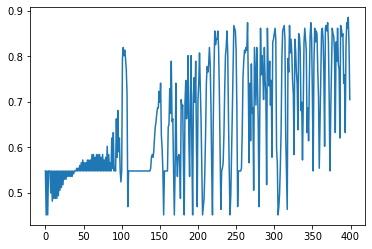

Test Accuracy:  0.5952381
MSE: 4.4800558898243725.4f


In [122]:
with tf.compat.v1.Session() as ses:
    #parameters for tensors
    learning_rate=0.3
    training_epoch=400
    #Loss Function
    cost_history=np.empty(shape=[1],dtype=float)
    n_dim=X.shape[1]
    n_class=2
    model_path=r'C:\Users\270881\Desktop\Python Pandas\sonar\sonar_model'
    n_hidden_1=60
    n_hidden_2=60
    n_hidden_3=60
    n_hidden_4=60
    w=tf.Variable(tf.zeros([n_dim,n_class]))
    x=tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    b=tf.Variable(tf.zeros([n_class]))
    y_=tf.compat.v1.placeholder(tf.float32,[None,n_class])
    
    def multilayer_perceptron(x,weights,biases):
        layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
        layer_1=tf.nn.sigmoid(layer_1)
        
        layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
        layer_2=tf.nn.sigmoid(layer_2)
        
        layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
        layer_3=tf.nn.sigmoid(layer_3)
        
        layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
        layer_4=tf.nn.relu(layer_4)
        
        out_layer=tf.matmul(layer_4,weights['out']) + biases['out']
        return out_layer
    weights={
        'h1': tf.Variable(tf.compat.v1.truncated_normal([n_dim,n_hidden_1])),
        'h2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1,n_hidden_2])),
        'h3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2,n_hidden_3])),
        'h4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3,n_hidden_4])),
        'out': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4,n_class])) }
    biases={
        'b1': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_1])),
        'b2': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_2])),
        'b3': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_3])),
        'b4': tf.Variable(tf.compat.v1.truncated_normal([n_hidden_4])),
        'out': tf.Variable(tf.compat.v1.truncated_normal([n_class])) }
    init= tf.compat.v1.global_variables_initializer()
    
    saver=tf.compat.v1.train.Saver()
    y=multilayer_perceptron(x,weights,biases)
    loss_func=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
    training_step=tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss_func)
    ses.run(init)
    #calculate loss and accuracy for each epoch
    mse_history=[]
    accuracy_history=[]
    loss_history=[]
    for epoch in range(training_epoch):
        ses.run(training_step,feed_dict={x:train_x,y_:train_y})
        loss=ses.run(loss_func,feed_dict={x:train_x,y_:train_y})
        loss_history=np.append(loss_history,loss)
        correct_prediction=tf.compat.v1.equal(tf.argmax(y,1),tf.argmax(y_,1))
        accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        pred_y=ses.run(y,feed_dict={x:test_x})
        mse=tf.reduce_mean(tf.square(pred_y-test_y))
        mse_=ses.run(mse)
        mse_history.append(mse_)
        accuracy=(ses.run(accuracy,feed_dict={x:train_x,y_:train_y}))
        accuracy_history.append(accuracy)
    save_path=saver.save(ses,model_path)


    plt.plot(accuracy_history)
    plt.show()
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Test Accuracy: ', ses.run(accuracy, feed_dict={x: test_x, y_: test_y}))

    # Print the final mean square error
    pred_y = ses.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print('MSE: {0}.4f'.format(ses.run(mse)))